<a href="https://colab.research.google.com/github/Amal-Emad/ASSIGNMENTS/blob/main/ass2techno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset from the csv file into a DataFrame.**

In [2]:
file_path = '/content/auto-mpg.csv'
df = pd.read_csv(file_path)

**# Show the shape of the dataframe and the general information.**


In [3]:
print("Shape of DataFrame:", df.shape)
print("\nGeneral Information:")
print(df.info())

Shape of DataFrame: (398, 9)

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


**Replace the origin values from 1, 2, 3 to USA, Europe, Japan.**

In [4]:
df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'}, inplace=True)

**Convert the datatype of horsepower column to float and replace missing values with the mean value.**

In [8]:
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)

<ipython-input-8-b304efbe1c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(float)


**Display the distribution and density of both horsepower and mpg values.**

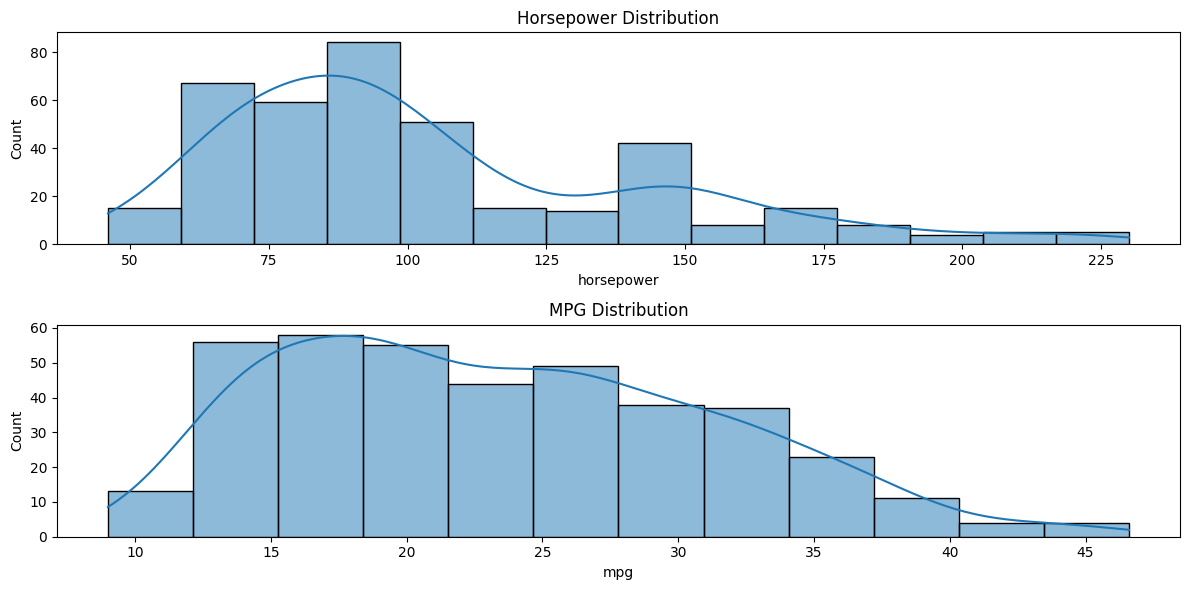

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df['horsepower'], kde=True)
plt.title('Horsepower Distribution')
plt.subplot(2, 1, 2)
sns.histplot(df['mpg'], kde=True)
plt.title('MPG Distribution')
plt.tight_layout()
plt.show()

**Using pairplot method, show the relation between mpg, horsepower, cylinders and weight.**

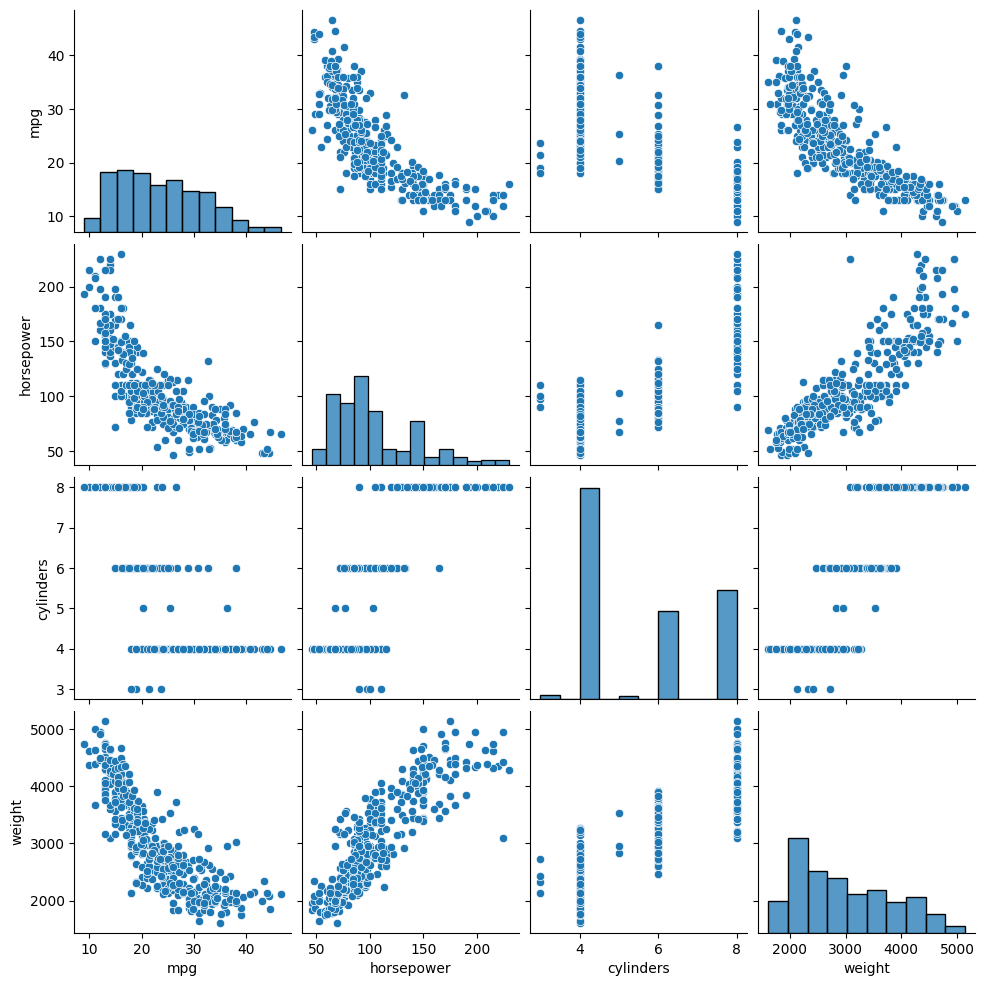

In [10]:
sns.pairplot(df[['mpg', 'horsepower', 'cylinders', 'weight']])
plt.show()


**Using heatmap method, show the correlation between mpg, horsepower, cylinders, origin and weight.**

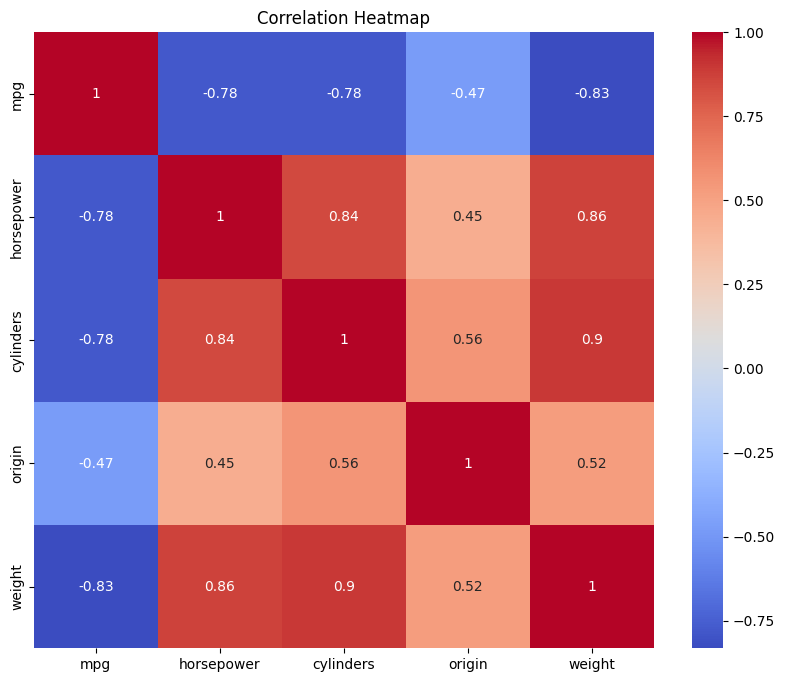

In [12]:
plt.figure(figsize=(10, 8))
df['origin'] = df['origin'].astype('category').cat.codes
sns.heatmap(df[['mpg', 'horsepower', 'cylinders', 'origin', 'weight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Using boxplot method, a) show the relation between mpg and origin. b) split the plot based on cylinders. c) split the plot based on year to new and old (new >1980 )**

In [18]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


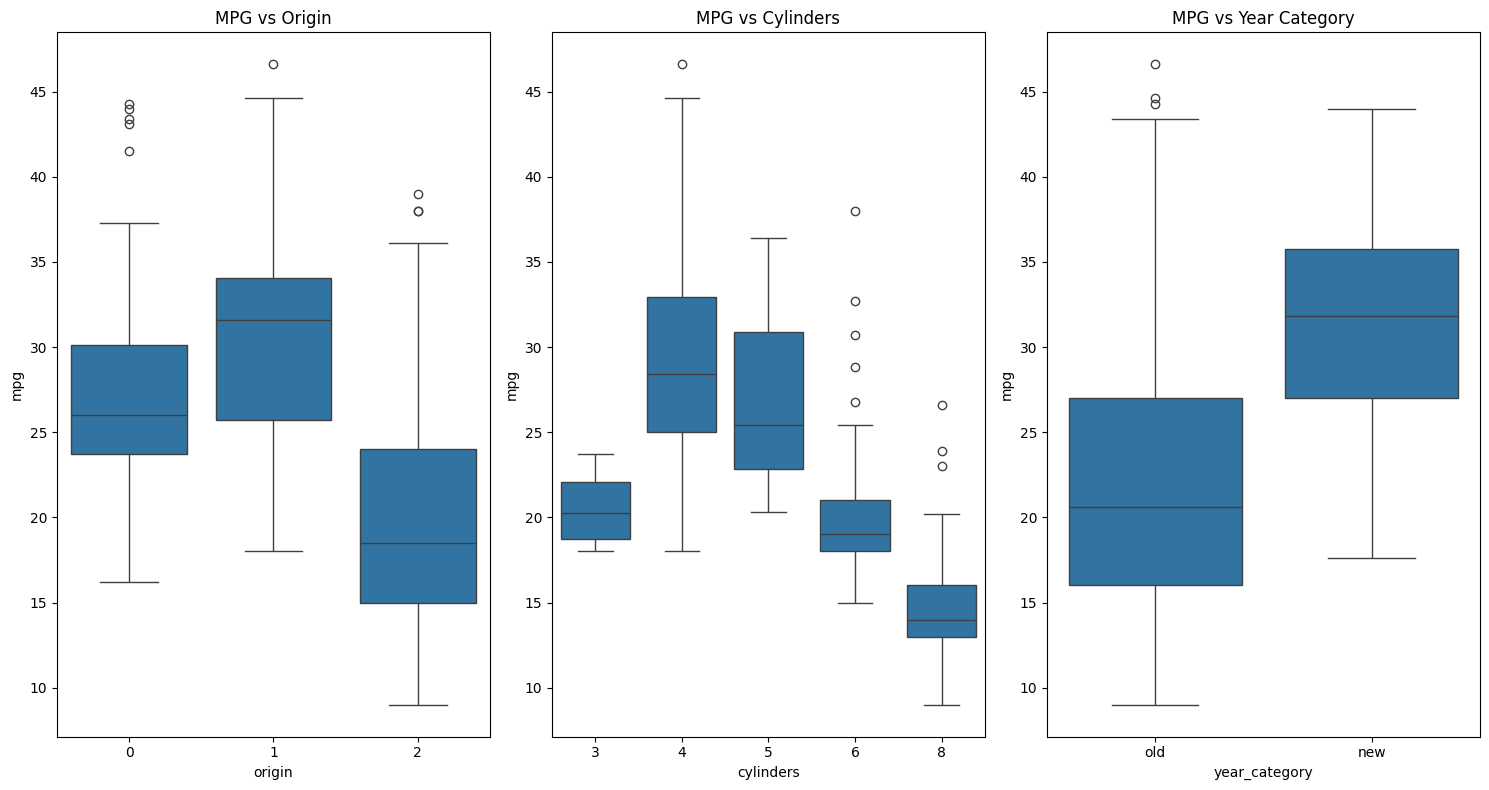

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG vs Origin')
plt.subplot(1, 3, 2)
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('MPG vs Cylinders')
plt.subplot(1, 3, 3)
df['year_category'] = df['model year'].apply(lambda x: 'new' if x > 80 else 'old')
sns.boxplot(x='year_category', y='mpg', data=df)
plt.title('MPG vs Year Category')
plt.tight_layout()
plt.show()
